# Workshop - Working with images in Python

Hello all - **welcome to the first module of the DAIM (Imaging) course!** We hope you learn lots during this course, and please contact one of the course leads if you have any questions or feedback.

### Introduction - Importing packages

First, let's start by importing all of the relevant packages that we will be using throughtout the workshop. This will be:
* PIL (Python Image Library)
* NumPy

If you would like a recap of how these libraries work, review the slides from the pre-workshop seminar.

In [18]:
from PIL import Image
import numpy as np

# Section 1 - Opening and modifying an image

## Exercise 1 - Opening an image

Let's start by opening an image. Import the PIL library, open `"tower.png"`, and display the image. Use [this resource](https://pillow.readthedocs.io/en/stable/handbook/tutorial.html) or the Section 1 seminar slides to help you.

In [ ]:
# Type your code here...

### Solution 1

In [1]:
#@title
from PIL import Image
im = Image.open("./tower.jpeg")
im.show()

The `im.show()` method is an easy way to inspect images when working with them in Python. PIL can also do basic image manipulations, such as cropping, rotating, and downscaling.

## Exercise 2 - Resizing an image

Get the current size of the image using the `im.size` property and reduce the size of the image by half using the `.resize()` method. Look this up online if you are unsure how to use it. *Hint: use the `//` (floor division) operator...*


In [ ]:
# Type your code here...

### Solution 2

In [4]:
#@title
# Get current size and divide it by two
width, height = im.size
new_size = (width // 2, height // 2)

im_small = im.resize(new_size)
im_small.show()

If you print the new size of the image you'll see that the dimensions of the image have reduced by half.

In [3]:
print(im_small.size)

(384, 512)


## Exercise 3 - Rotating images

Rotate this modified image so that it is upside down and save it as a new image called `modified_im`, then display the image. [This documentation is useful](https://pillow.readthedocs.io/en/stable/reference/Image.html).

In [ ]:
# Type your code here...

### Solution

In [28]:
#@title

im_rotated = im.rotate(180)
im_rotated.show()

**N.B.** A common pitfall with Python packages is forgetting if a method affects the original object or not. 
1. If the method does affect the original image, then you don't need to use an extra variable, or modify the original one. For example, `list.append("MI")` appends `"MI"` to the original list.
2. If the method does not affect the original image, then you need to use an extra variable for the result, or the variable itself. For example, `list.count("MI")` counts the number of times that `1` appears in the list, and then returns it.

Code which demonstrates this is shown below. All the PIL methods we've used so far **do not** modify the original image.

In [ ]:
list = ["PE", "stroke", "dissection"]

# Method affects the original object
appended_list = list.append("MI")
print(appended_list)    # This doesn't exist...
print(list)             # ...But the original list has been modified.

# Method does not affect the original object
number_of_mis = list.count("MI")
print("Number of MIs in list: ", number_of_mis)

## Exercise 4 - Cropping an image

PIL can also be used to crop images. This can be useful when only a certain part of the image is relevant to an analysis.

When cropping images, it's important to be aware of the [coordinate system that PIL uses](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#coordinate-system). It defines the pixel `(0, 0)` as the top-left corner, with y-coordinates increasing "down" the image, and x-coordinates increasing from left to right across the image.

[Visual of the coordinate system using the `im_small` image as an example ](images/coordinate_system.png)

For this task, the following region should be extracted from the image called `im_small` which we created in a previous cell:

* *A square box around the image that has a dimension of 150 by 150, centered on the point (200, 210).*

The documentation for this function can be found [here](https://pillow.readthedocs.io/en/stable/reference/Image.html).

In [ ]:
# Type your code here...

# Solution

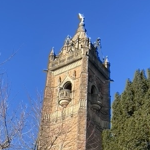

In [21]:
#@title

center_x, center_y = (200, 210)
dim = 150

right = center_x + dim // 2
left  = center_x - dim // 2

upper = center_y - dim // 2
lower = center_y + dim // 2

im_cropped = im_small.crop((left, upper, right, lower))
im_cropped

Make sure that bear this coordinate system in mind when using PIL, as it can feel slightly counter-intuitive: "upper" coordinates in the y-direction are further down in the image.

## Exercise 5 - Converting an image to grayscale

Images often need to be converted to greyscale before input into image processing algorithms or machine learning algorithms as it reduces them from 3 channels of data to 1 channel of data, changing the shape of the underlying data. More information on this concept can be found in the seminar slides before this workshop, and we will explore it here.

The task is:
* Write a function which:
    * Accepts a PIL image
    * Converts the image to a NumPy array
    * Prints the shape of the resulting array
* Next, create a copy of the `im_cropped` image.
    * Convert this copy from a colour image into a greyscale image.
* Use your function to print the shape of the image before and after the conversion. 

*What do you notice about the shape of the image when it is converted to greyscale?*

If you have any questions about any step in the above process, try to use Google searching appropriately to find the answer. Including the language (python) and the package you are using (PIL, NumPy) will help to return helpful responses.

### Solution

(150, 150, 3)
(150, 150)


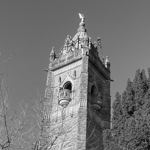

In [26]:
#@title

im_grey = im_cropped 

def print_img_shape(target_im):
    arr = np.array(target_im)
    print(arr.shape)

print_img_shape(im_grey)
im_grey = im_grey.convert('L')
print_img_shape(im_grey)

im_grey

The conversion to NumPy removes the last channel, so the image is `(150, 150)` rather than `(150, 150, 1)`. This is important, as some algorithms require this last channel in the shape of the image to be declared explicitly. *More on this later in the course...*